# Pour anaconda sous windows il faut installer:
- conda install -c conda-forge rise
- conda install m2w64-toolchain libpython
- conda install -c conda-forge fortran-magic
- conda install line_profiler
- conda install numba

In [1]:
%load_ext fortranmagic

from IPython.core.display import HTML
    
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Fast Numerical computation in python

I'm a heavy user of python. It's my favorite programming language for everyday tasks.
During my PhD i had to speand a lot of time optimising my simulation codes, and i wanted to share some skills.
The reason is that i can see a lot of pepole trying to do heavy task on python the wrong way. 
When your prototyping or scripting some non-intensive task, the way your coding does not have a lot of significance.
But when it comes to heavy numerical computation or dealing with small CPU resources with python, your coding style becomes one of the key features, just behind your algorithm.

1. Advantages and constraints of python* 

2. Only optimize the piece of code that need to be with line profiling

3. Numpy vectorisation*


4. Compile your loops JIT with numba


5. Developpe and optimize a taylored algorithm


*from Losing your Loops Fast Numerical Computing with NumPy (Jake VanderPlas)

# Advantages and constraints of python

<h1 style="color:#CCFFCC;">Python is FAST for</h1>

<div class="alert alert-block alert-success">
    
- Writing
- Testing
- Developping code
</div>


In [2]:
print("Hello word")

Hello word


<h1 style="color:#CCFFCC;">Python in FAST because:</h1>

<div class="alert alert-block alert-success">

- Interpreted
- Dynamically typed
- High level

</div>


<h1 style="color:#ffcccc;">Python is SLOW for:</h1>

<div class="alert alert-block alert-danger">
    
- Repetition of low level task
</div>


# Low level task in Python

In [3]:
def func_python(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 - 1) * i
    return d

In [4]:
time_python = %timeit -o func_python(10000)

1.06 ms ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


   # Low level task in Fortran

In [5]:
%%fortran
subroutine func_for(n, d)
    integer, intent(in) :: n
    double precision, intent(out) :: d
    integer :: i
    d = 0
    do i = 0, n - 1
        d = d + (mod(i, 3) - 1) * i
    end do
end subroutine func_for

In [6]:
time_fortran = %timeit -o func_for(10000)

13.5 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Python Vs Fortran

In [7]:
print("Python time: {0:.3g}s".format(time_python.average))

Python time: 0.00106s


In [8]:
print("Fortran time: {0:.3g}s".format(time_fortran.average))

Fortran time: 1.35e-05s


In [9]:
print("Fortran is x{0:.3g} time faster than python !".format(time_python.average/time_fortran.average))

Fortran is x78.5 time faster than python !


<h1 style="color:#CCE6FF;">Python is SLOW because:</h1>

<div class="alert alert-block alert-info">


- Python is high-level, interpreted, and dynamically-typed language

- Each Python operation comes with a small type-cheking overhead

- With many repeated small opearions (e.g in a loop), this overhead becomes significant !

</div>


# The paradox...

What makes Python __fast__ (for developement) is what makes Python __slow__ (for code execution)

# Strategies to optimize your python codes

# Strategy #1: Find an existing implementation !

Most problems have a low level implementation available in Python. 

You must find in which package ...

# Strategy #2: Line profiling

Only optimize the piece code that need to be optimize !

* A heavy calculation that is done only once may not need to be optimized
* A simple calculation that is done thousands of times may need to be optimized

In [10]:
from line_profiler import LineProfiler
import random

def do_stuff(numbers):
    s = sum(numbers)
    l = [numbers[i]/43 for i in range(len(numbers))]
    m = ['hello'+str(numbers[i]) for i in range(len(numbers))]

numbers = [random.randint(1,100) for i in range(1000)]
lp = LineProfiler()
lp_wrapper = lp(do_stuff)
lp_wrapper(numbers)
lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0006537 s
File: <ipython-input-10-34ce7046e1ee>
Function: do_stuff at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def do_stuff(numbers):
     5         1        123.0    123.0      1.9      s = sum(numbers)
     6         1       2040.0   2040.0     31.2      l = [numbers[i]/43 for i in range(len(numbers))]
     7         1       4374.0   4374.0     66.9      m = ['hello'+str(numbers[i]) for i in range(len(numbers))]



# Strategy #3: Numpy vectorisation

Numpy is designed to help us get the best of both worlds

- Fast development time of Python


- Fast execution time of C/Fortran


by pushing repeated operations into a statically-typed compiled layer.

# Four ways for speeding up code with numpy




- Use Numpy's ufuncs


- Use Numpy's aggregations


- Use Numpy's broadcasting


- Use Numpy's slicing, masking, and fancy indexing


Overall goal: push repeated operations into compiler code and get ride of slow loops !

# Way #1: Using Numpy's ufuncs

* ufuncs are Numpy's Universal fonctions
* They operate element-wise on arrays

Element-wise operations with python lists:

In [11]:
a = [1, 3, 6, 2, 9, 4, 5]
b = [val + 5 for val in a]
print(b)

[6, 8, 11, 7, 14, 9, 10]


with Numpy arrays:

In [12]:
import numpy as np
a = np.array(a)
b = a + 5
print(b)

[ 6  8 11  7 14  9 10]


# Ufuncs are fast

### Python

In [13]:
a = list(range(100000))
time_python = %timeit -o [val + 5 for val in a]

5.81 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Numpy

In [14]:
a = np.array(a)
time_numpy = %timeit -o a + 5

48 µs ± 743 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
print("Numpy is x{0:.3g} time faster than python !".format(time_python.average/time_numpy.average))

Numpy is x121 time faster than python !


<h1 style="color:#CCE6FF;">There are many ufuncs available</h1>

<div class="alert alert-block alert-info">

* Math operations (+ - * / // % **)
* Trigonometric functions (np.sin np.cos np.tan...)
* Bit-twiddling functions (& | ~ ^ >> <<)
* Comparison functions (< > <= >= == !=)
* Exponential functions (np.exp np.log np.log10...)
* Specialized ufuncs in scipy.special

And many, many more.

</div>

# Way #2: Using Numpy's aggregations

Aggregations are functions witch summarize the value in an array (e.g min, max, sum, mean, ect.)

## Numpy aggregations are much faster than Python built-ins

### Python

In [16]:
from random import random
c = [random() for i in range(100000)]

time_python = %timeit -o min(c)

1.91 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Numpy

In [17]:
c = np.array(c)

time_numpy = %timeit -o c.min()

34.9 µs ± 573 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
print("Numpy is x{0:.3g} time faster than python !".format(time_python.average/time_numpy.average))

Numpy is x54.8 time faster than python !


## Numpy aggreations work on multi-dimensional arrays

In [19]:
M = np.random.randint(0,10,(3,5))
M

array([[4, 9, 5, 0, 8],
       [1, 2, 0, 0, 1],
       [9, 6, 6, 7, 1]])

In [20]:
M.sum(axis=0)

array([14, 17, 11,  7, 10])

In [21]:
M.sum(axis=1)

array([26,  4, 29])

<h1 style="color:#CCE6FF;">Lots of aggregations available</h1>

<div class="alert alert-block alert-info">

np.min() np.max() np.sum() np.prod() np.mean() np.std()
np.var() np.any() np.all() np.median() np.percentile() np.argmin() np.argmax()...

np.nanmin() np.nanmax() np.nansum()

</div>

# Way #3: Use Numpy's broadcasting

Broadcasting is a set of rules by witch ufuncs operate on arrays of different size and/or dimensions

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when:

1. they are equal, or

2. one of them is 1

<img src="numpy_broadcasting.PNG">

# Broadcasting rules



1. If array shapes differ, left-pad the smaller shape with size 1.


2. If any dimension does not match, broadcast the dimension with size=1


3. If neither non-matching dimension is 1, raise an error.

<img src="numpy_broadcasting_cas_1.PNG">

#### At strarting 
* shape=[3] + shape[]

#### rule 1. If array shapes differ, left-pad the smaller shape with 1s
* shape=[3] + shape[1]

#### rule 2. If any dimension does not match, broadcast the dimension with size=1
* shape=[3] + shape[3] --> final shape = [3]

<img src="numpy_broadcasting_cas_2.PNG">

#### At strarting 
* shape=[3,3] + shape[3]

#### rule 1. If array shapes differ, left-pad the smaller shape with 1s
* shape=[3,3] + shape[1,3]

#### rule 2. If any dimension does not match, broadcast the dimension with size=1
* shape=[3,3] + shape[3,3] --> final shape = [3,3]

<img src="numpy_broadcasting_cas_3.PNG">

#### At strarting 
* shape=[3,1] + shape[3]

#### rule 1. If array shapes differ, left-pad the smaller shape with 1s
* shape=[3,1] + shape[1,3]

#### rule 2. If any dimension does not match, broadcast the dimension with size=1
* shape=[3,3] + shape[3,3] --> final shape = [3,3]

# Way #4: Use Numpy's slicing, masking, and fancy indexing


## With Python lists, indecing accepts integers of slices

In [22]:
L = [2, 3, 5, 7, 11]
L[0] # integer index

2

In [23]:
L[1:3] # slice for multiple elements

[3, 5]

## Numpy arrays are similar

In [24]:
import numpy as np
L = np.array(L)
L

array([ 2,  3,  5,  7, 11])

In [25]:
L[0]

2

In [26]:
L[1:3]

array([3, 5])

# but Numpy offers other fast and convenient indexing options as well.

## "Masking": indexing with boolean masks

In [27]:
L

array([ 2,  3,  5,  7, 11])

A mask is a boolean array:

In [28]:
mask = np.array([False, True, True, False, True])
L[mask]

array([ 3,  5, 11])

## "Masking": indexing with boolean masks

In [29]:
L

array([ 2,  3,  5,  7, 11])

Masks are often constructed using comparaison operators and boolean logic

In [30]:
mask = (L < 4) | (L > 8) # "|" = "bitwise or"
L[mask]

array([ 2,  3, 11])

## "Fancy indexing" : passing a list/array of indices

In [31]:
L

array([ 2,  3,  5,  7, 11])

In [32]:
ind = [0, 4 , 2]
L[ind]

array([ 2, 11,  5])

## Multiple dimensions: use commas to seperate indices

In [33]:
M = np.arange(6).reshape(2,3)
M

array([[0, 1, 2],
       [3, 4, 5]])

In [34]:
#multiple indices separated by comma
M[0,1]

1

In [35]:
M[:, 1]

array([1, 4])

## Masking in multiple dimensions

In [36]:
M

array([[0, 1, 2],
       [3, 4, 5]])

In [37]:
M[abs(M-3)<2]

array([2, 3, 4])

## Mixing fancy indexing and slicing

In [38]:
M

array([[0, 1, 2],
       [3, 4, 5]])

In [39]:
M[[1,0], :2]

array([[3, 4],
       [0, 1]])

## Mixing masking and slicing

In [40]:
M

array([[0, 1, 2],
       [3, 4, 5]])

In [41]:
M[M.sum(axis = 1) > 4, 1:]

array([[4, 5]])

In [42]:
M.sum(axis = 0) > 4

array([False,  True,  True])

# All of these operations can be composed and combined in nearly limitless way

<h1 style="color:#CCFFCC;">Numpy advantage:</h1>

<div class="alert alert-block alert-success">


- Python overhead per array rather than per array element

- Compact domain specific language for array operations

- Numpy is widely available

</div>

<h1 style="color:#ffcccc;">Numpy disadvantages:</h1>

<div class="alert alert-block alert-danger">
    
- Batch operations can lead to excessive memory usage
- Different way of thinking about writing code
</div>

<h1 style="color:#CCE6FF;">Recommendation</h1>

<div class="alert alert-block alert-info">

Use Numpy everywhere

</div>



# Strategy #4: Numba

In [43]:
def func_python(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 - 1) * i
    return d

time_python = %timeit -o func_python(10000)

1.45 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
from numba import jit

@jit(nopython=True)
def func_python(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 - 1) * i
    return d

time_numba = %timeit -o func_python(10000)

12.6 µs ± 981 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Python Vs Numba

In [45]:
print("Python time: {0:.3g}s".format(time_python.average))

Python time: 0.00145s


In [46]:
print("Numba time: {0:.3g}s".format(time_numba.average))

Numba time: 1.26e-05s


In [47]:
print("Numba is x{0:.3g} time faster than python !".format(time_python.average/time_numba.average))

Numba is x115 time faster than python !


<h1 style="color:#CCFFCC;">Numba advantage:</h1>

<div class="alert alert-block alert-success">


 - Python code JIT-compiler to fortran speeds!

</div>

<h1 style="color:#ffcccc;">Numba disadvantages:</h1>

<div class="alert alert-block alert-danger">
    
- Heavy dependency chain (LLVM)
- Some Python constructs not supported
- Still a bit finicky
</div>

<h1 style="color:#CCE6FF;">Recommendation</h1>

<div class="alert alert-block alert-info">

Use for analysis scripts where dependencies are not a concern.

</div>

# Real case comparaison between differents implementations

Implementing a fast FWHM code

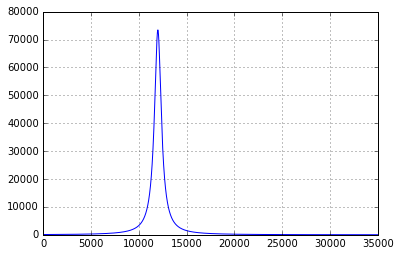

In [48]:
x = np.linspace(1,35000,35000)

def lorentzienne(x, amp=10000, cen=12000, mih=867):
    return amp**2 * ((2./(np.pi*mih)) / (1. + ((x-cen)/(mih/2.))**2))

y = lorentzienne(x)
plt.plot(x,y)
plt.grid()

# Good algorithm, fast implementation

### Scipy special function using cython

In [49]:
from scipy.signal import chirp, find_peaks, peak_widths

def FWHM_scipy(y):
    peaks, _ = find_peaks(y)
    results_half = peak_widths(y, peaks, rel_height=0.5)
    return results_half[0][0]

FWHM_scipy(y)

865.8707129187205

In [50]:
time_cython = %timeit -o FWHM_scipy(y)

157 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Bad algorithm, fast implementation

## FWHM using scipy interp1d and fsolve

In [51]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

def largeur_mi_hauteur(x,y,kind_inteporlation='linear',nb_pt_ecart_du_max=10):
    #On retire le min au signal
    min_y = np.min(y)
    y = y - min_y
    #On crée une fonction de y - max(y) / 2 dont on cherchera les zeros pour
    #determiner la largeur a mi hauteur
    funct_data = interp1d(x,y-y.max()/2., kind='linear', bounds_error=False, fill_value=-1.0)
    #On cherche l'index de la valeur max de y
    arg_x_max = np.argmax(y)
    #A partir de l'index que l'on decale a gauche et a droite de nb_pt_ecart_du_max
    #on determine les points de depart du solveur itératif
    point_depart_solveur_min = x[arg_x_max - nb_pt_ecart_du_max]
    point_depart_solveur_max = x[arg_x_max + nb_pt_ecart_du_max]
    points_depart_solveur = np.array([point_depart_solveur_min, 
                                      point_depart_solveur_max])
    #On cherche les premiers zeros de la fonction a gauche et a droite du max
    x_de_y_sur_2 = fsolve(funct_data, points_depart_solveur)
    #On determine la largeur a mi hauteur
    largeur_mi_hauteur = (x_de_y_sur_2.max() - x_de_y_sur_2.min())
    return largeur_mi_hauteur

largeur_mi_hauteur(x,y)

866.6926925680727

In [52]:
time_fsolve = %timeit -o largeur_mi_hauteur(x,y)

1.12 ms ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
from line_profiler import LineProfiler

lp = LineProfiler()
lp_wrapper = lp(largeur_mi_hauteur)
lp_wrapper(x,y)
lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0035609 s
File: <ipython-input-51-1f982b9af450>
Function: largeur_mi_hauteur at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def largeur_mi_hauteur(x,y,kind_inteporlation='linear',nb_pt_ecart_du_max=10):
     5                                               #On retire le min au signal
     6         1       4610.0   4610.0     12.9      min_y = np.min(y)
     7         1        604.0    604.0      1.7      y = y - min_y
     8                                               #On crée une fonction de y - max(y) / 2 dont on cherchera les zeros pour
     9                                               #determiner la largeur a mi hauteur
    10         1      11884.0  11884.0     33.4      funct_data = interp1d(x,y-y.max()/2., kind='linear', bounds_error=False, fill_value=-1.0)
    11                                               #On cherche l'index de la valeur max de y
    12        

# Good algorithm, slow implementation

## Pythonic way

In [54]:
x = x.tolist()
y = y.tolist()

In [55]:
def FWHM_python(x,y):
    n = len(y)
    min_y = min(y)
    y_no_offset = [val - min_y for val in y]
    max_y = max(y_no_offset)
    max_sur_2 = max_y/2
    index_max_y = y.index(max(y))
    for i in range(index_max_y,0,-1):
        if y_no_offset[i] < max_sur_2:
            index0 = i
            break
    for i in range(index_max_y,n):
        if y_no_offset[i] < max_sur_2:
            index1 = i
            break
    x0_0, x1_0, y0_0, y1_0 = x[index0], x[index0+1], y_no_offset[index0], y_no_offset[index0+1]
    x0_1, x1_1, y0_1, y1_1 = x[index1-1], x[index1], y_no_offset[index1-1], y_no_offset[index1]
    x0_inter = x0_0 + (x1_0-x0_0)*(max_sur_2-y0_0)/(y1_0-y0_0)
    x1_inter = x0_1 + (x1_1-x0_1)*(max_sur_2-y0_1)/(y1_1-y0_1)
    return x1_inter - x0_inter
FWHM_python(x,y)

866.6926925185362

In [56]:
time_pure_python = %timeit -o FWHM_python(x,y)

3.97 ms ± 85.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
print("Bad algorithm fast implementation is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_fsolve.average))

Bad algorithm fast implementation is x3.55 time faster than pure python !


In [58]:
print("Scipy special function is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_cython.average))

Scipy special function is x25.3 time faster than pure python !


<h1 style="color:#CCE6FF;">Recommendation</h1>

<div class="alert alert-block alert-info">

Optimize your algorithm before optimizing your code.

</div>

In [59]:
from line_profiler import LineProfiler

lp = LineProfiler()
lp_wrapper = lp(FWHM_python)
lp_wrapper(x,y)
lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0098 s
File: <ipython-input-55-c61a6e9c753c>
Function: FWHM_python at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def FWHM_python(x,y):
     2         1         24.0     24.0      0.0      n = len(y)
     3         1       7416.0   7416.0      7.6      min_y = min(y)
     4         1      52283.0  52283.0     53.4      y_no_offset = [val - min_y for val in y]
     5         1       9536.0   9536.0      9.7      max_y = max(y_no_offset)
     6         1         87.0     87.0      0.1      max_sur_2 = max_y/2
     7         1      10861.0  10861.0     11.1      index_max_y = y.index(max(y))
     8       435       4053.0      9.3      4.1      for i in range(index_max_y,0,-1):
     9       435       4585.0     10.5      4.7          if y_no_offset[i] < max_sur_2:
    10         1         13.0     13.0      0.0              index0 = i
    11         1         31.0     31.0      0.

## Let's speed up the code using numpy

In [60]:
x = np.array(x)
y = np.array(y)
def FWHM_numpy_1(x,y):
    n = len(y)
    min_y = min(y)
    y_no_offset = y-min_y
    max_y = max(y_no_offset)
    max_sur_2 = max_y/2
    index_max_y = y.argmax()
    for i in range(index_max_y,0,-1):
        if y_no_offset[i] < max_sur_2:
            index0 = i
            break
    for i in range(index_max_y,n):
        if y_no_offset[i] < max_sur_2:
            index1 = i
            break
    x0_0, x1_0, y0_0, y1_0 = x[index0-1], x[index0], y_no_offset[index0-1], y_no_offset[index0]
    x0_1, x1_1, y0_1, y1_1 = x[index1], x[index1+1], y_no_offset[index1], y_no_offset[index1+1]
    x0_inter = x0_0 + (x1_0-x0_0)*(max_sur_2-y0_0)/(y1_0-y0_0)
    x1_inter = x0_1 + (x1_1-x0_1)*(max_sur_2-y0_1)/(y1_1-y0_1)
    return x1_inter - x0_inter
FWHM_numpy_1(x,y)

866.6896698623641

In [61]:
time_numpy_1 = %timeit -o FWHM_numpy_1(x,y)

7.55 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
print("Python time: {0:.3g}s".format(time_pure_python.average))

Python time: 0.00397s


In [63]:
print("Numpy1 is x{0:.3g} time slower than pure python !".format(time_numpy_1.average/time_pure_python.average))

Numpy1 is x1.9 time slower than pure python !


<div class="alert alert-block alert-danger">

__Mixing Python function an Numpy array can be slower than pure python... :s__

</div>



In [64]:
from line_profiler import LineProfiler

lp = LineProfiler()
lp_wrapper = lp(FWHM_numpy_1)
lp_wrapper(x,y)
lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0093919 s
File: <ipython-input-60-2431f45c9cc2>
Function: FWHM_numpy_1 at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def FWHM_numpy_1(x,y):
     4         1         33.0     33.0      0.0      n = len(y)
     5         1      40961.0  40961.0     43.6      min_y = min(y)
     6         1        751.0    751.0      0.8      y_no_offset = y-min_y
     7         1      39222.0  39222.0     41.8      max_y = max(y_no_offset)
     8         1         72.0     72.0      0.1      max_sur_2 = max_y/2
     9         1       2699.0   2699.0      2.9      index_max_y = y.argmax()
    10       435       2111.0      4.9      2.2      for i in range(index_max_y,0,-1):
    11       435       3021.0      6.9      3.2          if y_no_offset[i] < max_sur_2:
    12         1          4.0      4.0      0.0              index0 = i
    13         1          8.0      8.0      0.0              brea

## Let's realy speed up the code using numpy

In [65]:
def FWHM_numpy_2(x,y):
    n = len(y)
    y_no_offset = y - np.min(y)
    max_y = np.max(y_no_offset)
    max_sur_2 = max_y/2
    index_max_y = y.argmax()
    for i in range(index_max_y,0,-1):
        if y_no_offset[i] < max_sur_2:
            index0 = i
            break
    for i in range(index_max_y,n):
        if y_no_offset[i] < max_sur_2:
            index1 = i
            break
    #return index0, index1
    x0_0, x1_0, y0_0, y1_0 = x[index0-1], x[index0], y_no_offset[index0-1], y_no_offset[index0]
    x0_1, x1_1, y0_1, y1_1 = x[index1], x[index1+1], y_no_offset[index1], y_no_offset[index1+1]
    x0_inter = x0_0 + (x1_0-x0_0)*(max_sur_2-y0_0)/(y1_0-y0_0)
    x1_inter = x0_1 + (x1_1-x0_1)*(max_sur_2-y0_1)/(y1_1-y0_1)
    return x1_inter - x0_inter
FWHM_numpy_2(x,y)

866.6896698623641

In [66]:
time_numpy_2 = %timeit -o FWHM_numpy_2(x,y)

272 µs ± 4.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
print("Python time: {0:.3g}s".format(time_pure_python.average))

Python time: 0.00397s


In [68]:
print("Numpy2 is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_numpy_2.average))

Numpy2 is x14.6 time faster than pure python !


In [69]:
from line_profiler import LineProfiler

lp = LineProfiler()
lp_wrapper = lp(FWHM_numpy_2)
lp_wrapper(x,y)
lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0021884 s
File: <ipython-input-65-ae809be1a4b7>
Function: FWHM_numpy_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def FWHM_numpy_2(x,y):
     2         1         28.0     28.0      0.1      n = len(y)
     3         1       6734.0   6734.0     30.8      y_no_offset = y - np.min(y)
     4         1        574.0    574.0      2.6      max_y = np.max(y_no_offset)
     5         1         38.0     38.0      0.2      max_sur_2 = max_y/2
     6         1        863.0    863.0      3.9      index_max_y = y.argmax()
     7       435       2311.0      5.3     10.6      for i in range(index_max_y,0,-1):
     8       435       3454.0      7.9     15.8          if y_no_offset[i] < max_sur_2:
     9         1          5.0      5.0      0.0              index0 = i
    10         1          8.0      8.0      0.0              break
    11       435       2924.0      6.7     13.4      for 

# Speed up the loops using Numba

In [70]:
from numba import jit

@jit(nopython=True)
def FWHM_index_python(x,y):
    n = len(y)
    y_no_offset = y - np.min(y)
    max_y = np.max(y_no_offset)
    max_sur_2 = max_y/2
    index_max_y = y.argmax()
    for i in range(index_max_y,0,-1):
        if y_no_offset[i] < max_sur_2:
            index0 = i
            break
    for i in range(index_max_y,n):
        if y_no_offset[i] < max_sur_2:
            index1 = i
            break
    #return index0, index1
    x0_0, x1_0, y0_0, y1_0 = x[index0-1], x[index0], y_no_offset[index0-1], y_no_offset[index0]
    x0_1, x1_1, y0_1, y1_1 = x[index1], x[index1+1], y_no_offset[index1], y_no_offset[index1+1]
    x0_inter = x0_0 + (x1_0-x0_0)*(max_sur_2-y0_0)/(y1_0-y0_0)
    x1_inter = x0_1 + (x1_1-x0_1)*(max_sur_2-y0_1)/(y1_1-y0_1)
    return x1_inter - x0_inter

In [71]:
time_numba = %timeit -o FWHM_index_python(x,y)

151 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
print("Numba + Numpy is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_numba.average))

Numba + Numpy is x26.3 time faster than pure python !


# Remove the loops using Numpy

In [73]:
def FWHM_numpy_final(x,y):
    y_no_offset = y - y.min()
    max_sur_2 = y_no_offset.max()/2
    index = np.argwhere(y_no_offset > max_sur_2)
    index0,index1 = index[0][0], index[-1][0]
    #return index0, index1
    x0_0, x1_0, y0_0, y1_0 = x[index0-1], x[index0], y_no_offset[index0-1], y_no_offset[index0]
    x0_1, x1_1, y0_1, y1_1 = x[index1], x[index1+1], y_no_offset[index1], y_no_offset[index1+1]
    x0_inter = x0_0 + (x1_0-x0_0)*(max_sur_2-y0_0)/(y1_0-y0_0)
    x1_inter = x0_1 + (x1_1-x0_1)*(max_sur_2-y0_1)/(y1_1-y0_1)
    return x1_inter - x0_inter

FWHM_numpy_final(x,y)

866.6926925185362

In [74]:
time_numpy_opti = %timeit -o FWHM_numpy_final(x,y)

97.5 µs ± 4.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
print("Numpy optimized is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_numpy_opti.average))

Numpy optimized is x40.7 time faster than pure python !


In [76]:
print("Scipy special function is x{0:.3g} time faster than pure python !".format(time_pure_python.average/time_cython.average))

Scipy special function is x25.3 time faster than pure python !


<h1 style="color:#CCE6FF;">Best practice !</h1>

<h3 style="color:#CCE6FF;">1) Find an existing implementation !</h3>

<h3 style="color:#CCE6FF;">2) Line profiling</h3>

<h3 style="color:#CCE6FF;">3) Optimize your algorithm before optimizing your code.</h3>

<h3 style="color:#CCE6FF;">4) Numpy vectorisation</h3>

<h3 style="color:#CCE6FF;">5) Speed up the loops using Numba</h3>

# Thank you for your attention

<h1 style="color:blue;">Titre de niveau 1</h1>
<h2>Titre de niveau 2</h2>
<h3>Titre de niveau 3</h3>